In [1]:
import math
import random

Задание 1

Моделирование пуассоновской случайной величины

Сервис по заказу такси “Блиц” расширяется и открывается в городе Барнаул. Необходимо рассчитать примерную нагрузку на таксистов. Доступа к данным с заказами у нас нет. Поэтому придется эти данные сгенерировать. Напишем функцию, возвращающую случайные значения, распределенные по закону Пуассона.

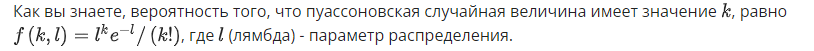

На практике мы немного модифицируем эту формулу, чтобы оптимизировать программу: при решении подсчитывать факториал на каждой итерации не нужно.

Для того, чтобы сгенерировать значения такой случайной величины, воспользуемся следующим алгоритмом: выберем случайное число y из промежутка [0, 1]. Затем будем суммировать f(k, l) до тех пор, пока сумма не превысит выбранного числа y. Тот k, на котором сумма превысила y - это и есть наш результат.

Входные данные: параметр l.
Результат: напишите функцию poisson(l), которая будет возвращать значения, распределённые по закону Пуассона с параметром l.
Например, poisson(3) чаще всего будет возвращать 2 или 3

In [2]:
def poisson(l):
    a,b,c,i = math.exp(-l), math.exp(-l), random.random(), 0
    while a <c:
        i += 1
        b = b * l/i
        a += b
    return i
    

In [3]:
poisson(3)

1

Задание 2

Отлично, сервис “Блиц” зашел на рынок транспортных услуг Барнаула и успешно доставляет пассажиров из точки А в точку N! Пришло время проверить, насколько сгенерированные нами ранее данные отличаются от реальных.

Для этого напишем функцию, которая генерирует массив случайных значений и сравнивает его с реальными данными – находит средний квадрат разности. Это стандартная метрика для нахождения отклонения одной величины от другой.

Будем считать, что у нас есть данные по дням за последний год (365 чисел). А именно, пусть у нас есть массив, i-й элемент которого содержит число пассажиров, перевезённых одним водителем в i-й день года. Будем считать, что эта случайная величина имеет распределение Пуассона.

Нам требуется найти параметр lambda (среднее значение пуассоновской величины как раз равно этому параметру). Затем, используя результат из предыдущей задачи, сгенерируем 365 чисел. Имея два массива (исходные данные и сгенерированные вами), посчитаем средний квадрат разности между соответствующими значениями: sum((data_real[i] - data_generated[i])2)/365.

Входные данные: массив data_real из 365 элементов, каждый из элементов равен количеству перевезённых пассажиров в соответствующий день.

Результат: напишите функцию poisson_error(data), которая сгенерирует массив data_generated и вернёт средний квадрат разности между исходными и сгенерированными данными.

In [4]:
def poisson(l):
    a,b,c,i = math.exp(-l), math.exp(-l), random.random(), 0
    while a <c:
        i += 1
        b = b * l/i
        a += b
    return i

def poisson_error(data):
    l = round(np.array(data).mean())
    data_generated = np.array([poisson(l) for x in range(len(data))])
    res=[0]*len(data_generated)
    for i in range(len(data_generated)):
        res[i]=(data[i]-data_generated[i])**2
    return np.mean(res)

Задание 3

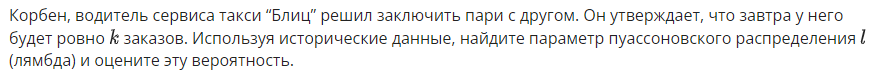

Входные данные: данные по поездкам data за предыдущие 365 дней и число k.

Результат: напишите функцию poisson_prob(data, k), вероятность того, что водитель завтра перевезёт ровно k пассажиров.

Пример: допустим, что data имеет распределение Пуассона с параметром l=3. Тогда функция poisson_prob(data, 3) должна вернуть 0.22404180765538773 .

In [5]:
def poisson_prob(data, k):
    l = sum(data) / len(data)
    result = math.exp(-l)
    for i in range(1, k + 1):
        result *= (l / i)
    return result

Задание 4

Пусть заказы в течение рабочей смены (8 часов) водителя не имеют пиков (т. е., это процесс Пуассона). Корбен хочет сделать перерыв на обед, но не хочет пропускать заказы. Посчитаем матожидание времени до следующего заказа, чтобы Корбен смог спланировать свой перекус.

Входные данные: как и в предыдущей задаче, нам доступны исторические данные по заказам за предыдущий год data (массив data из 365 элементов).

Результат: напишем функцию time_to_order(data), которая восстанавливает параметр l пуассоновского распределения и возвращает ожидаемое время до следующего заказа в часах.

Например, если вычисленный параметр распределения l будет равен 3, то функция time_to_order должна вернуть 2.6666666666666665.

In [6]:
def time_to_order(data):
    return 8 / np.array(data).mean()

Задание 5

Количество клиентов сервиса “Блиц” разнится изо дня в день. В целом, мы можем выделить обычные дни (основной поток), а также дни, когда происходят некоторые “знаковые” события (дополнительный поток): например, концерты или футбольные матчи. В такие “знаковые” дни пассажиропоток, а следовательно и число клиентов, растет. Необходимо найти параметры распределений основного потока и дополнительного.

Пусть нам даны количества поездок за предыдущие 365 дней и массив с номерами дней, которые были праздничными. Необходимо вернуть параметры пуассоновского распределения для обычных дней и для праздничных.

Входные данные: массив data с данными о количестве поездок и массив days с номерами праздничных дней (индексация с нуля).

Результат: напишите функцию estimate_parameters(data, days), возвращающую кортеж из двух чисел (l_usual, l_special). l_usual - параметр распределения в обычные дни, l_special - в праздничные.

In [7]:
def estimate_parameters(data, days):
    data = np.array(data)
    data_special = data[[days]]
    data_usual = np.delete(data, days)
    l_special = data_special.mean()
    l_usual = data_usual.mean()
    return (l_usual, l_special)
    